In [98]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [99]:
print(iris.feature_names)
print(iris.target_names)
featurenames=["sepal_length", "sepal_width", "petal_length", "petal_width"]
df_data= pd.DataFrame(data= iris.data, columns = featurenames)
df_target=pd.DataFrame(data= iris.target, columns=["target"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [100]:
df_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [102]:
df_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [103]:
totall_data= pd.concat([df_data,df_target], axis=1)

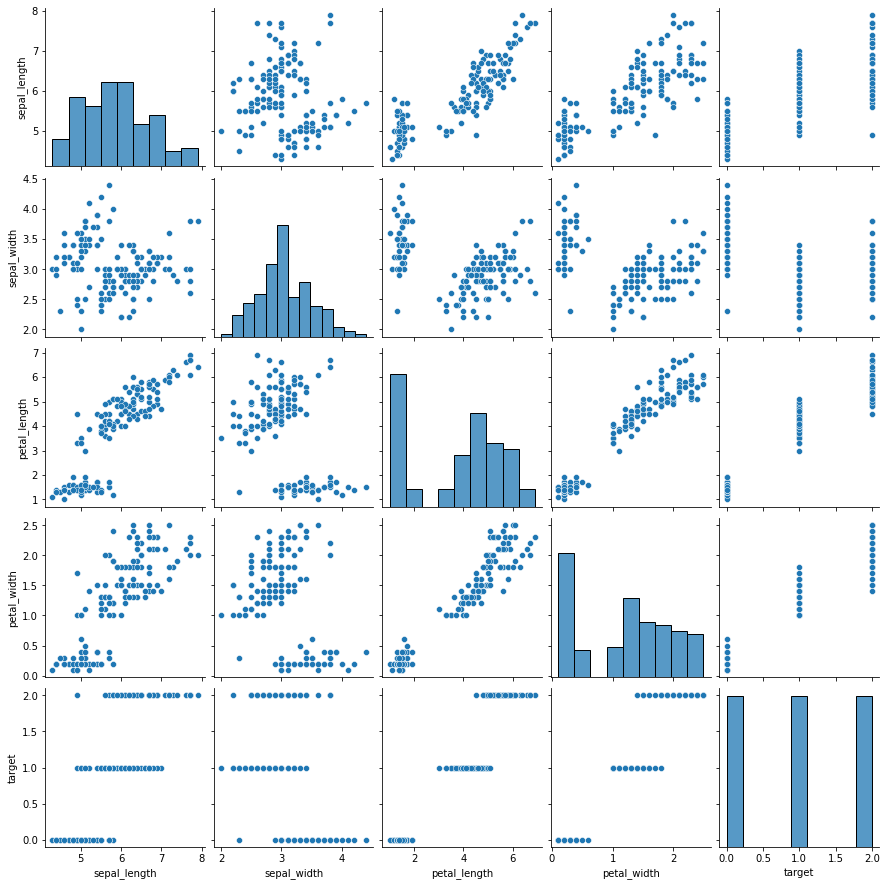

In [104]:
sns.pairplot(totall_data)
plt.show()

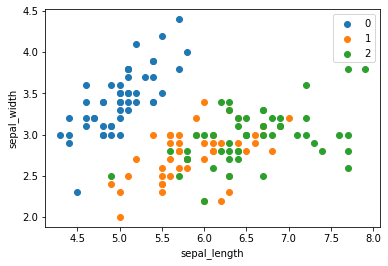

In [105]:
iris_by_class = totall_data.groupby(by='target')
for name, group in iris_by_class :
    plt.scatter(group['sepal_length'], group['sepal_width'],
    label=name)
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

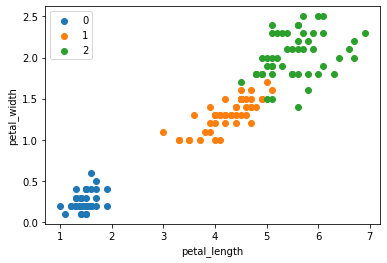

In [106]:
for name, group in iris_by_class:
    # print(name, len(group))
    plt.scatter(group['petal_length'], group['petal_width'],
    label=name)
plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

[('sepal_length', 'sepal_width'), ('sepal_length', 'petal_length'), ('sepal_length', 'petal_width'), ('sepal_width', 'petal_length'), ('sepal_width', 'petal_width'), ('petal_length', 'petal_width')]


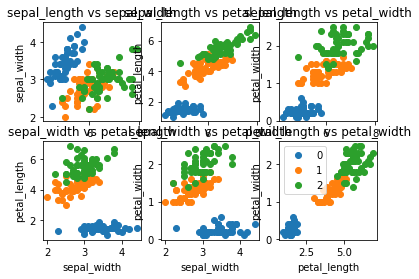

In [118]:

fig, ax = plt.subplots(2, 3)
xy_idx = 0
xy = []
ab = []
for i in range(4):
    for j in range(i+1, 4):
        xy.append((featurenames[i], featurenames[j]))
print(xy)
for row in range(2):
        for col in range(3):
            axis = ax[row, col] 
            x = xy[xy_idx][0] 
            y = xy[xy_idx][1] 
            xy_idx += 1 
            axis.set_title(f'{x} vs {y}') 
            axis.set_xlabel(x) 
            axis.set_ylabel(y) 
            for name, group in iris_by_class:
                axis.scatter(group[x], group[y], label=name)

plt.legend()
plt.show() 


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X=totall_data.drop('target',axis=1)
X.head()
y=df_target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
amodel = KNeighborsClassifier(n_neighbors=3)
amodel.fit(X_train, y_train)
prediction = amodel.predict(X_test)
accuracy = amodel.score(X_test, y_test)
print(accuracy)


0.9736842105263158


In [109]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))



--- SVM Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [110]:

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [111]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
